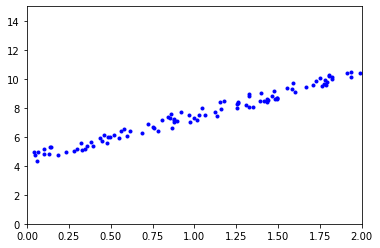

In [66]:
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

# Observations
X = 2 * np.random.rand(100,1)

# Y = 3X + 4 + bruit gaussien
Y = 4 + 3 * X + np.random.rand(100,1)

plot.plot(X,Y,'b.')
plot.axis([0,2,0,15])

plot.show()

Theta Best
[[4.47404664]
 [2.99793051]]
 Y_predict 
[[ 4.47404664]
 [10.46990766]]


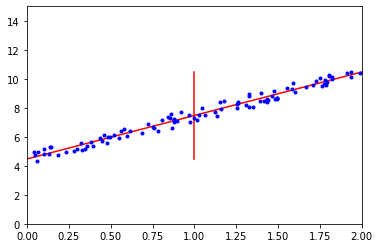

In [67]:
X_b = np.c_[np.ones((X.shape[0],1)),X]

theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@Y
print("Theta Best")
print(theta_best)

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

Y_predict = X_new_b@theta_best
print(" Y_predict ")
print(Y_predict)

plot.plot(X_new_b,Y_predict,'r-')
plot.plot(X,Y,'b.')
plot.axis([0,2,0,15])
plot.show()

[[0.07865832]
 [0.69445945]]
theta [[0.07865832]
 [0.69445945]]
theta [[1.1771976 ]
 [1.91501699]]
theta [[1.89661699]
 [2.68834942]]
theta [[2.37197069]
 [3.17453099]]
theta [[2.69007935]
 [3.47644529]]
theta [[2.90675984]
 [3.6602151 ]]
theta [[3.05790007]
 [3.76833439]]
theta [[3.16657779]
 [3.82810922]]
theta [[3.24763633]
 [3.85708342]]
theta [[3.31062587]
 [3.86652608]]
Theta Best [[3.36169395]
 [3.8636732 ]]
 Y_predict 
[[ 3.36169395]
 [11.08904035]]


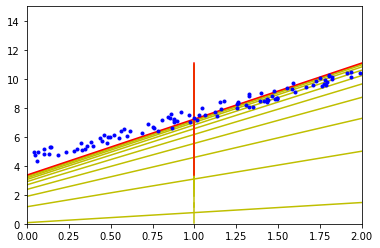

In [68]:
# Dérivée partielle V=2/m XT (X theta - Y)
m = len(X)
n_iterations = 1000
eta = 0.001

X_b = np.c_[np.ones((m,1)),X]
theta = np.random.rand(2,1)
print(theta)

def draw_plot(theta_d):
    X_d_new = np.array([[0],[2]])
    X_new_d_b = np.c_[np.ones((2,1)),X_d_new]

    Y_d_predict = X_new_d_b@theta_d
    plot.plot(X_new_d_b,Y_d_predict,'y-')
    

for i in range(n_iterations):
    gradient = (2/m)*(X_b.T@(X_b@theta - Y))
    if (i % 100 == 0):
        draw_plot(theta)
        print("theta",theta)
    theta = theta - eta * gradient
    
theta_best = theta
print("Theta Best", theta_best)

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

Y_predict = X_new_b@theta_best
print(" Y_predict ")
print(Y_predict)

plot.plot(X_new_b,Y_predict,'r-')
plot.plot(X,Y,'b.')
plot.axis([0,2,0,15])
plot.show()

In [3]:
import tensorflow as tf


x_tf = tf.Variable(2,"x_tf")
y_tf = tf.Variable(3,"y_tf")
M = tf.constant([[0,1,2,3],[0,1,2,3]])
A = tf.constant([[0,1],[0,1],[0,1],[0,1]])

z = (2*x_tf + 5*y_tf + 3)*M@A

init = tf.global_variables_initializer();

with tf.Session() as sess:
    init.run()
    res = z.eval()
    print(res)

[[  0 132]
 [  0 132]]


In [ ]:
# Observations
X = 2 * np.random.rand(100,1)

# Y = 3X + 4 + bruit gaussien
Y = 5 + 2 * X + np.random.rand(100,1)


m = len(X)
n_iterations = 1000
eta = 0.001

X_b = tf.constant(np.c_[np.ones((m,1)),X], dtype=tf.float32, name="X")
theta = tf.Variable(tf.random_uniform([2,1],-1,1),name="theta",dtype=tf.float32)
Y_tf = tf.constant(Y, dtype=tf.float32, name="Y")

init = tf.global_variables_initializer();

error = X_b@theta - Y_tf
mse = tf.reduce_mean(tf.square(error))
gradient = (2/m)*(tf.transpose(X_b)@error)
training_op = tf.assign(theta, theta - eta * gradient)


with tf.Session() as sess:
    init.run()

    for i in range(n_iterations):
        if i % 100 == 0:
            print("mse: ",mse.eval())
        training_op.eval()
    
    theta_best = theta.eval()
    print("Theta Best", theta_best)


In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

tf.reset_default_graph()

print(housing.data.shape)
print(housing.feature_names)
print(housing.target)

#n_iterations = 2500000
#eta = 0.0000001
eta = 0.0000001
batch_size = 100
n_epochs = 20
n_batches = int(np.ceil(m / batch_size))
m, n = housing.data.shape

print(" ---  n_batches ", n_batches)
print(" --- ")

def fetch_batch(epoch,batch_index,batch_size):
    Y = housing.target.reshape(-1,1)
    X_b = np.c_[np.ones((m,1)),housing.data]
    
    raw_index = batch_index * batch_size
    X_batch = X_b[raw_index:raw_index + batch_size,:]
    Y_batch = Y[raw_index:raw_index + batch_size,:]
    
    return X_batch,Y_batch

Y = tf.placeholder(shape=(None,1),dtype=tf.float32, name="Y")
X_b = tf.placeholder(shape=(None,n + 1),dtype=tf.float32, name="X_b")
theta = tf.Variable(tf.random_uniform([n + 1,1],-1,1),name="theta",dtype=tf.float32)

init = tf.global_variables_initializer()

error = X_b@theta - Y
mse = tf.reduce_mean(tf.square(error))
gradient = tf.gradients(mse,theta,name="gradient")
optimizer = tf.train.GradientDescentOptimizer(eta)
training_op = optimizer.minimize(mse)

prevMse = 0
i = 0

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, Y_batch = fetch_batch(1,batch_index,batch_size)
            
            #print(" -------- ", batch_index)
            #print(prevMse)
            #print(newMse)
            """
            if prevMse == 0 or prevMse > newMse / 10:
                prevMse = newMse
            else:
                print("BREAK")
                break
            """

            if i % 100 == 0:
                newMse = mse.eval(feed_dict={Y:Y_batch,X_b:X_batch})
                print(" ************************************ ")
                print("i",i)
                print("MSE ",newMse)
            sess.run(training_op,feed_dict={Y:Y_batch,X_b:X_batch})
            i += 1
        
    theta_best = theta.eval()
    print(theta_best)


(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
 ---  n_batches  207
 --- 
 ************************************ 
i 0
MSE  58587.387
 ************************************ 
i 100
MSE  6489.0156
 ************************************ 
i 200
MSE  1300.7466
 ************************************ 
i 300
MSE  2530.525
 ************************************ 
i 400
MSE  1828.2405
 ************************************ 
i 500
MSE  1031.6053
 ************************************ 
i 600
MSE  739.6847
 ************************************ 
i 700
MSE  604.8451
 ************************************ 
i 800
MSE  688.44836
 ************************************ 
i 900
MSE  270.44122
 ************************************ 
i 1000
MSE  365.96777
 ************************************ 
i 1100
MSE  381.0589
 ************************************ 
i 1200
MSE  395.88663
 ************************************ 
i 130